# Steps

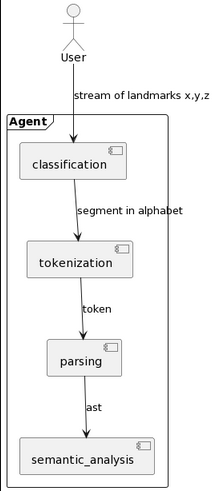

# Create space

In [1]:
from mexican_sign_language_toolkit.pose_landmarker import detect_landmarks_from_image, PoseLandmarker
import glob
import numpy as np
images = glob.glob('datasets/dictionary/*.png')
pose_landmarker = PoseLandmarker()
regex,db = pose_landmarker.create_database_from_images(images)
np.save('../checkpoints/sign_language_space.npy', db)
np.save('../checkpoints/regex.npy', regex)

ModuleNotFoundError: No module named 'mexican_sign_language_toolkit'

# Load space from a checkpoint

In [1]:
import numpy as np
space = np.load('../checkpoints/sign_language_space.npy', allow_pickle=True)
regex = str(np.load('../checkpoints/regex.npy', allow_pickle=True))
regex

'(?P<noise>[\\n\\r\\s]+)|(?P<BORREGO>BORREGO-1)|(?P<BUHO>BUHO-1)|(?P<BURRO>BURRO-1BURRO-2)|(?P<CABALLO>CABALLO-1CABALLO-2)|(?P<CALAMAR>CALAMAR-1CALAMAR-2)|(?P<CAMARON>CAMARON-1CAMARON-2)|(?P<CANGREJO>CANGREJO-1CANGREJO-2)|(?P<CANGURO>CANGURO-1CANGURO-2)|(?P<CHANGO>CHANGO-1)|(?P<CONEJO>CONEJO-1CONEJO-2)|(?P<FOCA>FOCA-1FOCA-2)|(?P<LOBO>LOBO-1LOBO-2)|(?P<MARIPOSA>MARIPOSA-1MARIPOSA-2)|(?P<OSO>OSO-1)|(?P<PELICANO>PELICANO-1PELICANO-2)'

# Classification

In [2]:
from mexican_sign_language_toolkit.neighbors import Bruteforce
from mexican_sign_language_toolkit.pose_landmarker import detect_landmarks_from_image
brute_force = Bruteforce(space)
brute_force.classify(space[17]['matrix'])

'CONEJO-1'

# Tokenization

In [5]:
from mexican_sign_language_toolkit.lexer import tokenize

match = tokenize(regex)

stream = [brute_force.classify(space[16]['matrix']), brute_force.classify(space[18]['matrix'])]

for signal in stream:
    result = match(signal)
    if result:
        print(result)

# Pipeline

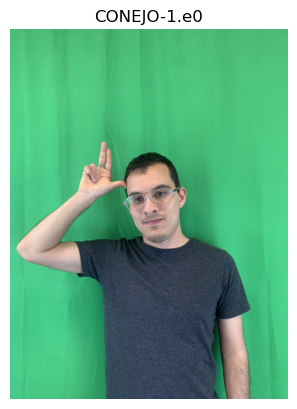

In [7]:
import cv2
import glob
from matplotlib import pyplot as plt
import os

def cv2_imshow(img):
    plt.imshow(img)
    plt.title(os.path.basename(images[0]).replace(".png", ""))
    plt.axis(False)
    plt.show()

images = glob.glob('datasets/dictionary/CONEJO-*.png')
A,B = cv2.imread(images[0]),cv2.imread(images[3])
A,B = cv2.cvtColor(A, cv2.COLOR_BGR2RGB),cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
cv2_imshow(A)

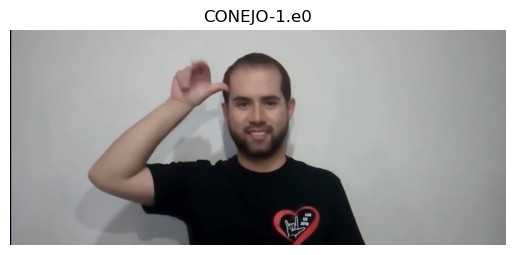

In [8]:
cv2_imshow(B)

# Tests

In [7]:
from mexican_sign_language_toolkit.pipeline import pipeline
import glob
import numpy as np
import cv2

def read_images(*paths):
    images = []
    for path in paths:
        images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    return images

predict = pipeline()

segment_1,segment_2 = read_images(glob.glob('datasets/dictionary/CONEJO-1*.png')[0], glob.glob('datasets/dictionary/CONEJO-2*.png')[0])
assert predict(segment_1) == ''
assert predict(segment_2) == 'CONEJO'

segment_1,segment_2 = read_images(glob.glob('datasets/dictionary/CANGREJO-1*.png')[0], glob.glob('datasets/dictionary/CANGREJO-2*.png')[0])
assert predict(segment_1) == ''
assert predict(segment_2) == 'CANGREJO'

In [4]:
1//3

0

In [1]:
from mexican_sign_language_toolkit.pipeline import pipeline, VideoPipeline

predict = pipeline(VideoPipeline())
predict('datasets/videos/chango.mp4')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


'PELICANO CONEJO CHANGO'

# Test yourself

# Demo with images

In [9]:
import gradio as gr
import numpy as np
from mexican_sign_language_toolkit.pipeline import pipeline
import glob 
predict = pipeline()

def f(image,state):
    prediction = predict(np.array(image))
    if prediction != "":
        state += " " + prediction
    return [state,state]

state = gr.State(value="")
demo = gr.Interface(
    f,
    [gr.Image(),state], 
    ["text", state],
    examples=glob.glob('datasets/dictionary/CONEJO*'),
    cache_examples=True
)
demo.launch(share=True)

C:\Users\uabc_\anaconda3\envs\env3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\uabc_\anaconda3\envs\env3\lib\site-packages\gradio\interface.py:244: UserWarning: Cache examples cannot be used with state inputs and outputs.Setting cache_examples to False.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://05cb7e35f72a373869.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Demo with video

In [9]:
import gradio as gr
import numpy as np
from mexican_sign_language_toolkit.pipeline import pipeline,VideoPipeline
import glob 
predict = pipeline(VideoPipeline())

def f(path):
    prediction = predict(path)
    print(prediction)
    return prediction

demo = gr.Interface(
    f,
    [gr.Video()], 
    ["text"],
    examples=glob.glob('datasets/videos/*.mp4'),
    title="Mexican sign language demo",
    description="mexican-sign-language-toolkit",
)
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7865
Running on public URL: https://5a101f2fb3e16fd9ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


PELICANO CONEJO CHANGO CHANGO CHANGO CHANGO CHANGO CHANGO


# TODO: Apply other approaches

In [21]:
from sklearn.neighbors import KDTree
import numpy as np
from uuid_extensions import uuid7, uuid7str
space = np.array([
    [1,0]
])
db = [uuid7(), uuid7(), uuid7(), uuid7()]

kdt = KDTree(space, leaf_size=30, metric='euclidean')
distance, indices = kdt.query([[1,0]])
space[indices][0]

array([[1, 0]])